In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
!ls

 Beer_Dataset2.csv	     Presentation	    beer2-updated.csv
'Data Preprocessing.ipynb'  'Previous Work'	    beer2.csv
 LASSO.ipynb		    'Random Forest.ipynb'   beer_ds.csv
 LightGBM.ipynb		     XGBoost.ipynb	   'updated dataset.ipynb'


In [3]:
beer = pd.read_csv("beer2-updated.csv")

In [4]:
beer

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,5,6,7,1.1,2.1,3.1,4.1,5.1,6.1,7.1
0,0,9.128,61.98714,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,8.727577e+05,8.814005e+05,8.671273e+05,2.207553e+05,1.457499e+05,1.666197e+05,1.933046e+05,1.888590e+05,2.458660e+05,2.028690e+05
1,1,9.229,61.98715,Unknown,[M-H]-,NaN,0.04,True,NaN,NaN,...,8.697251e+05,1.022110e+06,9.437931e+05,2.327672e+05,3.215483e+05,2.448614e+05,2.103618e+05,2.080273e+05,3.418114e+05,3.186896e+05
2,2,9.533,61.98759,Unknown,[M-H]-,NaN,0.31,True,NaN,NaN,...,1.770576e+06,1.999293e+06,1.513107e+06,2.607648e+05,1.119821e+06,5.915776e+05,8.070450e+05,8.239325e+05,6.741544e+05,8.055535e+05
3,3,9.635,61.98781,Unknown,[M-H]-,NaN,0.62,True,NaN,NaN,...,2.390722e+06,2.596938e+06,2.216654e+06,1.225389e+06,9.338393e+05,1.236626e+06,1.233204e+06,1.187461e+06,1.384672e+06,1.116334e+06
4,4,9.635,68.99432,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,3.400414e+05,9.397078e+05,3.668989e+05,1.846038e+06,3.101512e+05,1.482857e+05,3.626097e+05,1.870365e+05,4.163787e+05,1.865268e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,2681,3.854,945.47107,Unknown,[M-H]-,NaN,0.24,True,NaN,NaN,...,2.476549e+06,1.681853e+06,2.901601e+06,4.239282e+05,3.101129e+03,1.656965e+03,1.777607e+03,2.112875e+06,9.580613e+05,2.432418e+06
2682,2682,3.854,952.37624,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,9.812037e+04,4.098328e+04,1.130309e+05,1.759780e+04,1.277314e+02,5.119120e+02,1.317067e+03,8.070669e+04,2.652892e+04,9.235989e+04
2683,2683,9.635,961.75020,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,4.705986e+04,2.537252e+04,4.651866e+04,1.577294e+05,2.366777e+04,3.301792e+04,1.464097e+04,2.877071e+04,1.150401e+04,3.780831e+04
2684,2684,9.026,961.75466,Unknown,[M-H]-,NaN,0.01,True,NaN,NaN,...,8.007255e+03,5.108935e+04,6.756473e+03,4.362757e+04,6.873575e+03,5.980137e+03,2.429177e+03,7.227977e+03,1.477259e+05,7.391381e+03


In [5]:
beer.isnull().sum()

Alignment ID       0
Average Rt(min)    0
Average Mz         0
Metabolite name    0
Adduct type        0
                  ..
3.1                0
4.1                0
5.1                0
6.1                0
7.1                0
Length: 120, dtype: int64

In [6]:
beer.columns

Index(['Alignment ID', 'Average Rt(min)', 'Average Mz', 'Metabolite name',
       'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned',
       'Reference RT', 'Reference m/z',
       ...
       '5', '6', '7', '1.1', '2.1', '3.1', '4.1', '5.1', '6.1', '7.1'],
      dtype='object', length=120)

# Removing excess columns that are not needed for the current analysis

In [7]:
#dropping unnecessary columns

beer.drop('1.1', inplace=True, axis=1)
beer.drop('2.1', inplace=True, axis=1)
beer.drop('3.1', inplace=True, axis=1)
beer.drop('4.1', inplace=True, axis=1)
beer.drop('5.1', inplace=True, axis=1)
beer.drop('6.1', inplace=True, axis=1)
beer.drop('7.1', inplace=True, axis=1)
beer.drop('1', inplace=True, axis=1)
beer.drop('2', inplace=True, axis=1)
beer.drop('3', inplace=True, axis=1)
beer.drop('4', inplace=True, axis=1)
beer.drop('5', inplace=True, axis=1)
beer.drop('6', inplace=True, axis=1)
beer.drop('7', inplace=True, axis=1)

columns_to_drop = ['Average Rt(min)', 'Average Mz', 'Metabolite name', 'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned', 'Reference RT', 'Reference m/z', 'Formula', 'Ontology', 'INCHIKEY', 'SMILES', 'Annotation tag (VS1.0)', 'RT matched', 'm/z matched', 'MS/MS matched', 'Comment', 'Manually modified for annotation', 'Manually modified for quantification','Isotope tracking parent ID', 'Isotope tracking weight number', 'RT similarity', 'm/z similarity','Simple dot product','Weighted dot product','Reverse dot product','Matched peaks count','Matched peaks percentage','Total score','S/N average','Spectrum reference file name','MS1 isotopic spectrum','MS/MS spectrum', 'Alignment ID']  # List of column names to drop
beer = beer.drop(columns=columns_to_drop)


# Sample Names and Features only remaining in the dataset

In [8]:
beer

,5102023_All_QC_003,5102023_All_QC_040,5102023_BLD_1_022,5102023_BLD_2_023,5102023_BLD_QC_021,5102023_GER_1_032,5102023_GER_2_033,5102023_GER_3_034,5102023_GER_4_035,5102023_GER_5_036,...,592023_IPA_QC_011,592023_SOU_1_017,592023_SOU_2_018,592023_SOU_QC_016,592023_STU_1_007,592023_STU_2_008,592023_STU_QC_006,592023_WHE_1_027,592023_WHE_2_028,592023_WHE_QC_026
0,1206145,892381,967402,984546,986604,959579,959907,932237,945783,926200,...,969392,867985,919867,902563,958806,926734,964519,823458,817188,831937
1,1274830,945133,1039500,1056546,1059673,1021407,1020772,996653,1013396,994965,...,1025675,920298,970243,966268,1028653,991006,1022076,872604,858183,886660
2,2207415,1688109,3407085,3539493,1855423,1804752,1791092,1770235,1830673,1808963,...,3393456,1608449,3458278,1702791,3403004,1746892,1842175,1530622,1485663,1551082
3,4359182,3208560,1738776,1735118,3381080,3460201,3108538,3469225,3209343,3450384,...,1610618,2999555,1560638,3324136,1699402,3100788,3425686,2835754,2986838,2890867
4,177840,135325,449647,225435,146978,141667,218380,425744,216879,343215,...,731549,299528,308400,197008,765707,1033615,654969,342958,168233,360477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,1579045,1472180,8758,2848,5043,0,4326,4375,2464,78,...,317,2315,4572400,2391704,946410,2832827,1770868,7085,4663319,3565228
2682,33833,62940,54,262,62,0,349,2088,0,985,...,153,0,143904,91323,15083,44758,22828,67,155583,116630
2683,70105,76586,90265,78235,78880,83279,83985,90192,71706,69565,...,39127,47287,45656,31339,27018,14757,20829,49520,50530,57309
2684,12436,11361,18840,15432,9340,11003,17703,10150,15188,13721,...,1853,8077,2431,14704,361,857,1139,2875,4166,7385


In [9]:
#checking for missing values
beer.isnull().sum()

5102023_All_QC_003    0
5102023_All_QC_040    0
5102023_BLD_1_022     0
5102023_BLD_2_023     0
5102023_BLD_QC_021    0
                     ..
592023_STU_2_008      0
592023_STU_QC_006     0
592023_WHE_1_027      0
592023_WHE_2_028      0
592023_WHE_QC_026     0
Length: 71, dtype: int64

# Beer Sample Abbreiviations
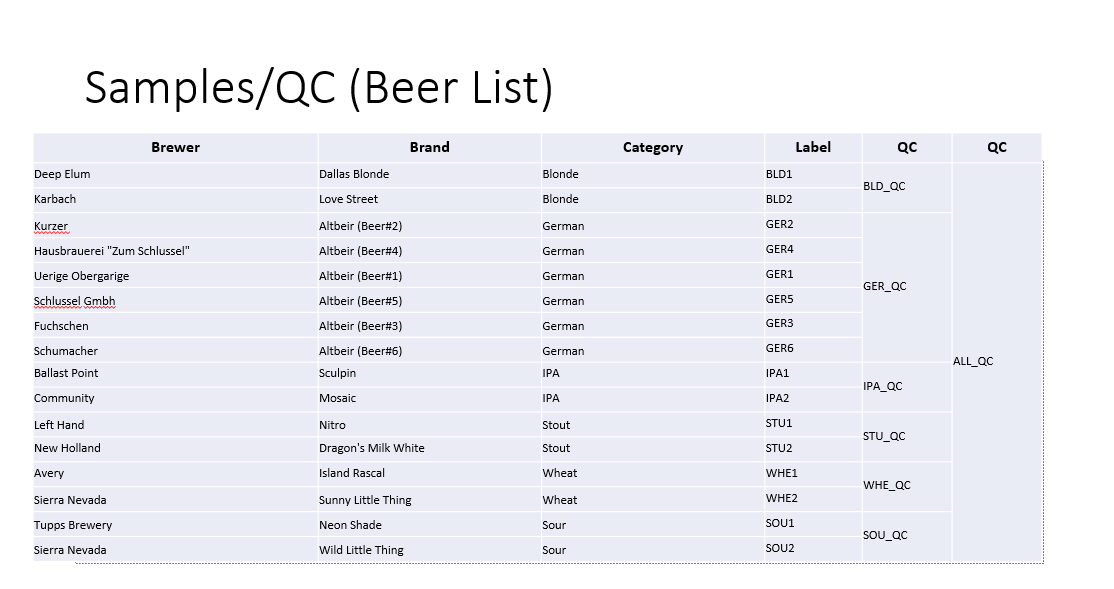

In [10]:
#transposing the dataset
beer = beer.T

Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [11]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

#e minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


      Feature Index  Min Feature Value  Max Feature Value
0                 1             507948            1759020
1                 2             466169            4088947
2                 3             433959            4359182
3                 4             133707            4441401
4                 5             142763            3226243
...             ...                ...                ...
2680           2681                  0            6472603
2681           2682                  0             241154
2682           2683                  0             407731
2683           2684                  0             444990
2684           2685                  0             246497

[2685 rows x 3 columns]


In [12]:
import pandas as pd

# Reset the index to include the sample names as a regular column
beer = beer.reset_index()
beer = beer.rename(columns={'index': 'Sample'})

In [13]:
beer.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,1206145,1274830,2207415,4359182,177840,269556,1036610,1004434,1033505,...,47968,91172,137430,81283,58446,1579045,33833,70105,12436,53816
1,5102023_All_QC_040,892381,945133,1688109,3208560,135325,478907,539238,732492,902671,...,35206,57453,4010,60423,63424,1472180,62940,76586,11361,44397
2,5102023_BLD_1_022,967402,1039500,3407085,1738776,449647,727863,923668,862115,891862,...,39964,11866,8123,96319,61191,8758,54,90265,18840,372
3,5102023_BLD_2_023,984546,1056546,3539493,1735118,225435,150396,4340521,829040,863771,...,13800,6044,5769,8975,5635,2848,262,78235,15432,231
4,5102023_BLD_QC_021,986604,1059673,1855423,3381080,146978,148355,610422,885109,1562338,...,38476,22734,7539,39845,27754,5043,62,78880,9340,254


In [14]:
import pandas as pd

# Assuming beer is your DataFrame containing the 'Sample' column

# Define the abbreviation mapping
abbreviation_mapping = {'BLD': 'Blonde',
                        'GER': 'German',
                        'IPA': 'IPA',
                        'STU': 'Stout',
                        'WHE': 'Wheat',
                        'SOU': 'Sour',
                        'All': 'All'}

# Create a new DataFrame for processing
df = beer.copy()  # Copy the original DataFrame

# Extract class from the sample name using the abbreviation mapping
df['Class'] = df['Sample'].apply(lambda x: abbreviation_mapping.get(x.split('_')[1], 'Other'))

# One-hot encode the presence of 'QC' in the sample name
df['QC'] = df['Sample'].str.contains('QC').astype(int)

# Display the DataFrame with the new 'Class' and 'QC' columns
print(df)


                Sample        0        1        2        3        4        5  \
0   5102023_All_QC_003  1206145  1274830  2207415  4359182   177840   269556   
1   5102023_All_QC_040   892381   945133  1688109  3208560   135325   478907   
2    5102023_BLD_1_022   967402  1039500  3407085  1738776   449647   727863   
3    5102023_BLD_2_023   984546  1056546  3539493  1735118   225435   150396   
4   5102023_BLD_QC_021   986604  1059673  1855423  3381080   146978   148355   
..                 ...      ...      ...      ...      ...      ...      ...   
66    592023_STU_2_008   926734   991006  1746892  3100788  1033615  1424326   
67   592023_STU_QC_006   964519  1022076  1842175  3425686   654969  1449777   
68    592023_WHE_1_027   823458   872604  1530622  2835754   342958   433742   
69    592023_WHE_2_028   817188   858183  1485663  2986838   168233   254985   
70   592023_WHE_QC_026   831937   886660  1551082  2890867   360477   832748   

          6        7        8  ...    2

In [19]:
# Reorder columns to have 'Is_QC' at the beginning
df = df[['Sample','Class', 'QC'] + [col for col in df.columns if col not in ['Sample','Class', 'QC']]]
df

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1206145,1274830,2207415,4359182,177840,269556,1036610,...,47968,91172,137430,81283,58446,1579045,33833,70105,12436,53816
1,5102023_All_QC_040,All,1,892381,945133,1688109,3208560,135325,478907,539238,...,35206,57453,4010,60423,63424,1472180,62940,76586,11361,44397
2,5102023_BLD_1_022,Blonde,0,967402,1039500,3407085,1738776,449647,727863,923668,...,39964,11866,8123,96319,61191,8758,54,90265,18840,372
3,5102023_BLD_2_023,Blonde,0,984546,1056546,3539493,1735118,225435,150396,4340521,...,13800,6044,5769,8975,5635,2848,262,78235,15432,231
4,5102023_BLD_QC_021,Blonde,1,986604,1059673,1855423,3381080,146978,148355,610422,...,38476,22734,7539,39845,27754,5043,62,78880,9340,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,926734,991006,1746892,3100788,1033615,1424326,1402140,...,17666,10654,221774,137235,101334,2832827,44758,14757,857,80338
67,592023_STU_QC_006,Stout,1,964519,1022076,1842175,3425686,654969,1449777,1478993,...,7289,26478,354104,114836,85896,1770868,22828,20829,1139,71852
68,592023_WHE_1_027,Wheat,0,823458,872604,1530622,2835754,342958,433742,1331621,...,133123,41372,3170,36145,41646,7085,67,49520,2875,106
69,592023_WHE_2_028,Wheat,0,817188,858183,1485663,2986838,168233,254985,1263554,...,3149,15489,8732,47852,25502,4663319,155583,50530,4166,126671


In [20]:
print(df['QC'].unique())
print(df['Sample'].unique())
print(df['Class'].unique())

[1 0]
['5102023_All_QC_003' '5102023_All_QC_040' '5102023_BLD_1_022'
 '5102023_BLD_2_023' '5102023_BLD_QC_021' '5102023_GER_1_032'
 '5102023_GER_2_033' '5102023_GER_3_034' '5102023_GER_4_035'
 '5102023_GER_5_036' '5102023_GER_6_037' '5102023_GER_QC_031'
 '5102023_IPA_1_012' '5102023_IPA_2_013' '5102023_IPA_QC_011'
 '5102023_SOU_1_017' '5102023_SOU_2_018' '5102023_SOU_QC_016'
 '5102023_STU_1_007' '5102023_STU_2_008' '5102023_STU_QC_006'
 '5102023_WHE_1_027' '5102023_WHE_2_028' '5102023_WHE_QC_026'
 '582023_All_QC_003' '582023_BLD_1_022' '582023_BLD_2_023'
 '582023_BLD_QC_021' '582023_GER_1_032' '582023_GER_2_033'
 '582023_GER_3_034' '582023_GER_4_035' '582023_GER_5_036'
 '582023_GER_6_037' '582023_GER_QC_031' '582023_IPA_1_012'
 '582023_IPA_2_013' '582023_IPA_QC_011' '582023_SOU_1_017'
 '582023_SOU_2_018' '582023_SOU_QC_016' '582023_STU_1_007'
 '582023_STU_2_008' '582023_STU_QC_006' '582023_WHE_1_027'
 '582023_WHE_2_028' '582023_WHE_QC_026' '592023_All_QC_003'
 '592023_All_QC_040' '5920

In [21]:
unique_classes = df['Class'].unique()
num_classes = len(unique_classes)
print(unique_classes)
print("Number of classes:", num_classes)

['All' 'Blonde' 'German' 'IPA' 'Sour' 'Stout' 'Wheat']
Number of classes: 7


# The Class column contains several unique beer classes, including 'All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Water', and 'Wheat'. 'All' and 'Water' are not actua classes but rather control or reference categories. 'All' should be excluded since it could skew the analysis if treated as a separate class.


In [26]:
df.isnull().sum()

Sample    0
Class     0
QC        0
0         0
1         0
         ..
2681      0
2682      0
2683      0
2684      0
2685      0
Length: 2689, dtype: int64

In [27]:
df.index

RangeIndex(start=0, stop=71, step=1)

In [28]:
df.to_csv('beer2_ds.csv', index=False)